### AdaBoost Classifier - from scratch... pseudocode walkthrough

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [27]:
from sklearn.datasets import load_breast_cancer
lbc = load_breast_cancer()
df = pd.DataFrame(lbc.data, columns=lbc.feature_names)
df['y'] = lbc.target
df['y'] = np.where(df['y'] ==0, -1, df['y'])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [28]:
df['y'].value_counts()

 1    357
-1    212
Name: y, dtype: int64

In [29]:
#print(lbc.DESCR)

In [30]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,-1
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,-1
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


In [31]:
df.shape

(569, 31)

In [32]:
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

### Step-1

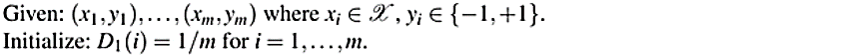

In [33]:
m=569
D1 = 1/m
df['D1'] = D1

In [34]:
df.iloc[:,28:].head(4)

,worst symmetry,worst fractal dimension,y,D1
0,0.3014,0.08750,1,0.001757
1,0.2551,0.06589,-1,0.001757
2,0.2837,0.08019,-1,0.001757
3,0.2556,0.09359,1,0.001757


### Step-2

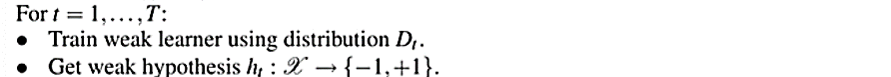

In [35]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=1)
dtc.fit(df.loc[:,cols], df['y'])

DecisionTreeClassifier(max_depth=1, random_state=42)

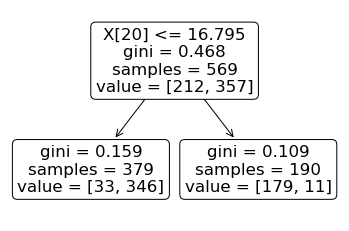

In [36]:
tree.plot_tree(dtc, rounded=True)
plt.show()

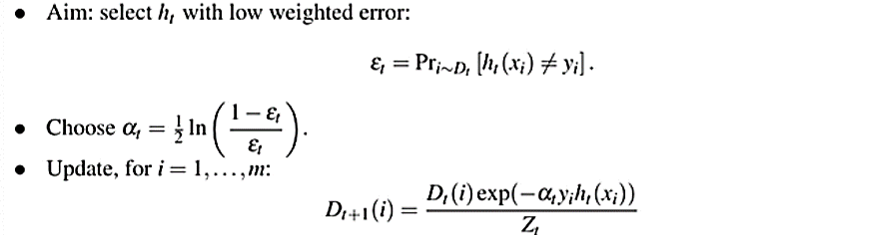

In [37]:
y_pred = dtc.predict(df.loc[:,cols]) #### ht
df['y_pred1'] = y_pred
tot_error = sum(df['D1'][df['y']!=df['y_pred1']])
alpha = 0.5*np.log((1-tot_error)/tot_error)
df['alpha1'] = alpha

In [38]:
df['D2'] = df['D1']*np.exp(-alpha*df['y']*df['y_pred1'])
zt = sum(df['D2'])
df['D2'] = df['D2']/zt

In [39]:
df.iloc[:,28:].head(3)

,worst symmetry,worst fractal dimension,y,D1,y_pred1,alpha1,D2
0,0.3014,0.08750,1,0.001757,1,1.239604,0.000952
1,0.2551,0.06589,-1,0.001757,-1,1.239604,0.000952
2,0.2837,0.08019,-1,0.001757,-1,1.239604,0.000952


In [40]:
df.iloc[:,28:][df['y_pred1']!=df['y']].head(3)

,worst symmetry,worst fractal dimension,y,D1,y_pred1,alpha1,D2
20,0.2589,0.10300,-1,0.001757,1,1.239604,0.011364
58,0.2807,0.10710,-1,0.001757,1,1.239604,0.011364
70,0.3080,0.09333,-1,0.001757,1,1.239604,0.011364


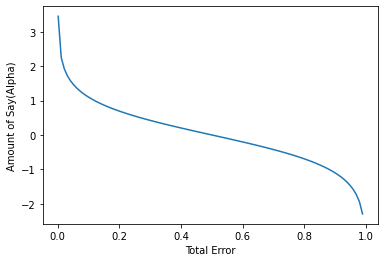

In [41]:
terror = np.linspace(0.001, 0.99, 100)
alpha = 0.5*np.log((1-terror)/terror)
plt.plot(terror, alpha)
plt.xlabel('Total Error')
plt.ylabel('Amount of Say(Alpha)')
plt.show()

### Step-3

#### Now let's build the loop to build many trees and aggregate the results

In [42]:
lbc = load_breast_cancer()
df = pd.DataFrame(lbc.data, columns=lbc.feature_names)
df['y'] = lbc.target
df['y'] = np.where(df['y'] ==0, -1, df['y'])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

## Initialize the weight
m=569
D1 = 1/m
df['D1'] = D1

In [43]:
T=4
for i in range(T):
    dtc = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=1)
    dtc.fit(df.loc[:,cols], df['y'])
    
    ### calculate total error and alpha
    y_pred = dtc.predict(df.loc[:,cols]) #### ht
    df['y_pred'+str(i)] = y_pred
    tot_error = sum(df['D1'][df['y']!=df['y_pred'+str(i)]])
    alpha = 0.5*np.log((1-tot_error)/tot_error)
    print('alpha', i, alpha)
    df['alpha'+str(i)]= alpha
    
    ### update weights
    df['D2'] = df['D1']*np.exp(-alpha*(df['y']*df['y_pred'+str(i)]))
    zt = sum(df['D2'])
    df= df.drop('D1', axis=1)     
    df['D2'] = df['D2']/zt
    df['D1'] = df['D2']            

alpha 0 1.239604314336681
alpha 1 -3.5527136788005136e-15
alpha 2 -2.2204460492503136e-16
alpha 3 -3.108624468950448e-15


In [44]:
df.iloc[:,28:].head(4)

,worst symmetry,worst fractal dimension,y,y_pred0,alpha0,D2,y_pred1,alpha1,y_pred2,alpha2,y_pred3,alpha3,D1
0,0.3014,0.08750,1,1,1.239604,0.000952,1,-3.552714e-15,1,-2.220446e-16,1,-3.108624e-15,0.000952
1,0.2551,0.06589,-1,-1,1.239604,0.000952,-1,-3.552714e-15,-1,-2.220446e-16,-1,-3.108624e-15,0.000952
2,0.2837,0.08019,-1,-1,1.239604,0.000952,-1,-3.552714e-15,-1,-2.220446e-16,-1,-3.108624e-15,0.000952
3,0.2556,0.09359,1,1,1.239604,0.000952,1,-3.552714e-15,1,-2.220446e-16,1,-3.108624e-15,0.000952


In [45]:
df['y_pred']=0
for i in range(T):
    df['y_pred'] = df['y_pred'] + df['alpha'+str(i)]*df['y_pred'+str(i)]

df['y_pred'] = np.sign(df['y_pred'])

In [46]:
df.iloc[:,28:].head(4)

,worst symmetry,worst fractal dimension,y,y_pred0,alpha0,D2,y_pred1,alpha1,y_pred2,alpha2,y_pred3,alpha3,D1,y_pred
0,0.3014,0.08750,1,1,1.239604,0.000952,1,-3.552714e-15,1,-2.220446e-16,1,-3.108624e-15,0.000952,1.0
1,0.2551,0.06589,-1,-1,1.239604,0.000952,-1,-3.552714e-15,-1,-2.220446e-16,-1,-3.108624e-15,0.000952,-1.0
2,0.2837,0.08019,-1,-1,1.239604,0.000952,-1,-3.552714e-15,-1,-2.220446e-16,-1,-3.108624e-15,0.000952,-1.0
3,0.2556,0.09359,1,1,1.239604,0.000952,1,-3.552714e-15,1,-2.220446e-16,1,-3.108624e-15,0.000952,1.0


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(df['y'], df['y_pred']))
print(accuracy_score(df['y'], df['y_pred']))

[[179  33]
 [ 11 346]]
0.9226713532513181


In [48]:
from sklearn.ensemble import AdaBoostClassifier
dtc = DecisionTreeClassifier(criterion='gini', random_state=42, 
                             max_depth=1)
abc = AdaBoostClassifier(dtc, n_estimators=4, algorithm='SAMME')
abc.fit(df.loc[:,cols], df['y'])
y_pred = abc.predict(df.loc[:,cols])

print(confusion_matrix(df['y'], y_pred))
print(accuracy_score(df['y'], y_pred))

[[203   9]
 [ 11 346]]
0.9648506151142355
